In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
with open('exp3_marker_data.pickle', 'rb') as f:
    data = pickle.load(f)

msg_timestamp_all = []
center_timestamp_all = []
markers_all = []
center_all = []
c2_all = []
c1_all = []
c0_all = []
is_flying_all = []
future_pos_all = []
future_vel_all = []
kf_center_all = []
kf_vel_all = []

future_times = np.array([0, 0.05, 0.1, 0.15, 0.2, 0.25])
num_prediction = len(future_times)
for sample in data['dataset']:
    msg_timestamp_all.append(sample[0]) # must exist

    if not sample[1] is None:
        center_timestamp_all.append(sample[1])
    else:
        center_timestamp_all.append(0)
    
    markers_all.append(sample[2])

    if not sample[3] is None:
        center_all.append(sample[3])
    else:
        center_all.append([0, 0, 0])

    if not sample[4] is None:
        c2_all.append(sample[4])
    else:
        c2_all.append([0, 0, 0])
    
    if not sample[5] is None:
        c1_all.append(sample[5])
    else:
        c1_all.append([0, 0, 0])
    
    if not sample[6] is None:
        c0_all.append(sample[6])
    else:
        c0_all.append([0, 0, 0])
    
    is_flying_all.append(sample[7])

    if not sample[8] is None:
        future_pos_all.append(sample[8])
    else:
        future_pos_all.append(np.zeros((num_prediction,3)))
    
    if not sample[9] is None:
        future_vel_all.append(sample[9])
    else:
        future_vel_all.append(np.zeros((num_prediction,3)))

    if not sample[10] is None:
        kf_center_all.append(sample[10])
    else:
        kf_center_all.append([0, 0, 0])
    
    if not sample[11] is None:
        kf_vel_all.append(sample[11])
    else:
        kf_vel_all.append([0, 0, 0])

msg_timestamp_all = np.array(msg_timestamp_all)
msg_timestamp_all -= msg_timestamp_all[0]
center_timestamp_all = np.array(center_timestamp_all)
center_timestamp_all -= center_timestamp_all[0]
center_all = np.array(center_all)
c2_all = np.array(c2_all)
c1_all = np.array(c1_all)
c0_all = np.array(c0_all)
is_flying_all = np.array(is_flying_all)
future_pos_all = np.array(future_pos_all)
future_vel_all = np.array(future_vel_all)
kf_center_all = np.array(kf_center_all)
kf_vel_all = np.array(kf_vel_all)

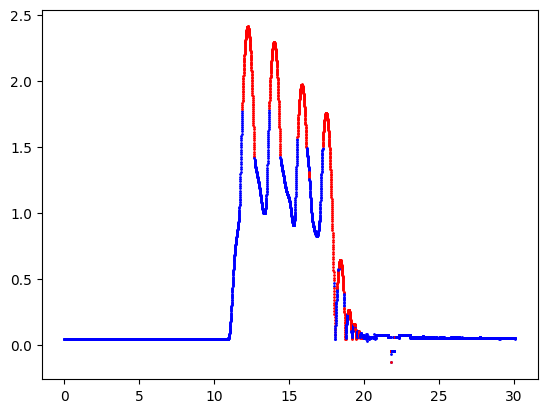

In [3]:
# plot the center_all in two different colors based on is_flying
for i in range(len(center_all)):
    if is_flying_all[i]:
        plt.plot(center_timestamp_all[i], center_all[i][-1], 'ro', markersize=1)
    else:
        plt.plot(center_timestamp_all[i], center_all[i][-1], 'bo', markersize=1)
    
plt.show()

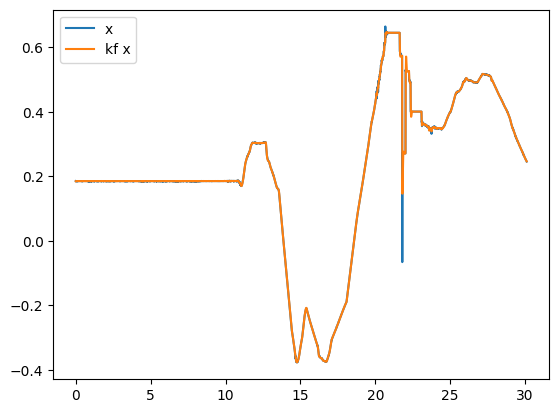

In [4]:
plt.plot(center_timestamp_all, center_all[:,0], label='x')
plt.plot(center_timestamp_all, kf_center_all[:,0], label='kf x')

plt.legend(loc='upper left')

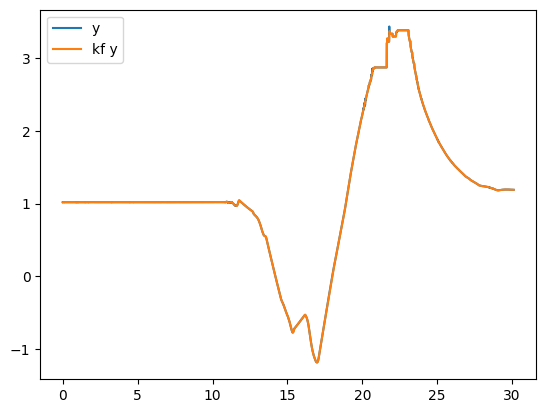

In [5]:
plt.plot(center_timestamp_all, center_all[:,1], label='y')
plt.plot(center_timestamp_all, kf_center_all[:,1], label='kf y')
plt.legend(loc='upper left')

4153
4296


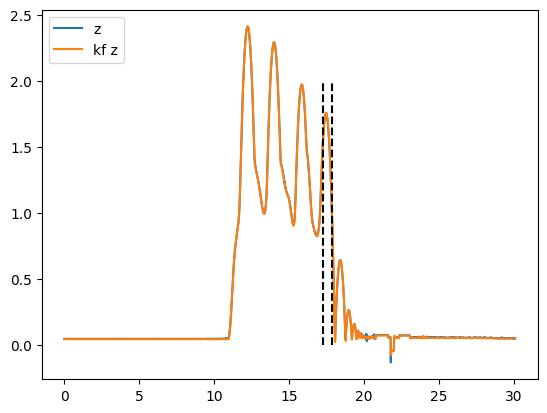

In [13]:
plt.plot(center_timestamp_all, center_all[:,2], label='z')
plt.plot(center_timestamp_all, kf_center_all[:,2], label='kf z')
idx_start = np.argmax(center_timestamp_all > 17.3)
idx_end = np.argmax(center_timestamp_all > 17.9)
plt.vlines(center_timestamp_all[idx_start], 0, 2, colors='k', linestyles='dashed')
plt.vlines(center_timestamp_all[idx_end], 0, 2, colors='k', linestyles='dashed')
plt.legend(loc='upper left')
print(idx_start)
print(idx_end)


Text(0.5, 1.0, 't=t_current+0.0')

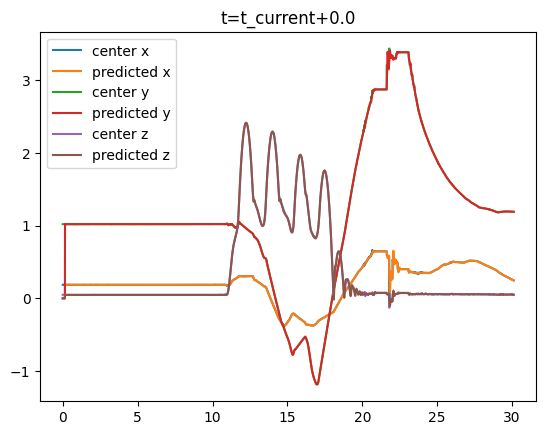

In [12]:
idx = 0
t_ahead = future_times[idx]

plt.plot(msg_timestamp_all, center_all[:, 0], label='center x')
plt.plot(msg_timestamp_all+t_ahead, future_pos_all[:,idx,0], label='predicted x')
plt.plot(msg_timestamp_all, center_all[:, 1], label='center y')
plt.plot(msg_timestamp_all+t_ahead, future_pos_all[:,idx,1], label='predicted y')
plt.plot(msg_timestamp_all, center_all[:, 2], label='center z')
plt.plot(msg_timestamp_all+t_ahead, future_pos_all[:,idx,2], label='predicted z')
plt.legend()
plt.title("t=t_current+{}".format(t_ahead))

Text(0.5, 1.0, 't=t_current+0.05')

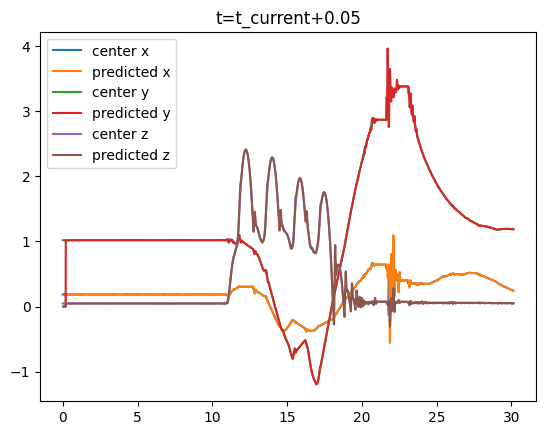

In [11]:
idx = 1
t_ahead = future_times[idx]

plt.plot(msg_timestamp_all, center_all[:, 0], label='center x')
plt.plot(msg_timestamp_all+t_ahead, future_pos_all[:,idx,0], label='predicted x')
plt.plot(msg_timestamp_all, center_all[:, 1], label='center y')
plt.plot(msg_timestamp_all+t_ahead, future_pos_all[:,idx,1], label='predicted y')
plt.plot(msg_timestamp_all, center_all[:, 2], label='center z')
plt.plot(msg_timestamp_all+t_ahead, future_pos_all[:,idx,2], label='predicted z')
plt.legend()
plt.title("t=t_current+{}".format(t_ahead))

Text(0.5, 1.0, 't=t_current+0.1')

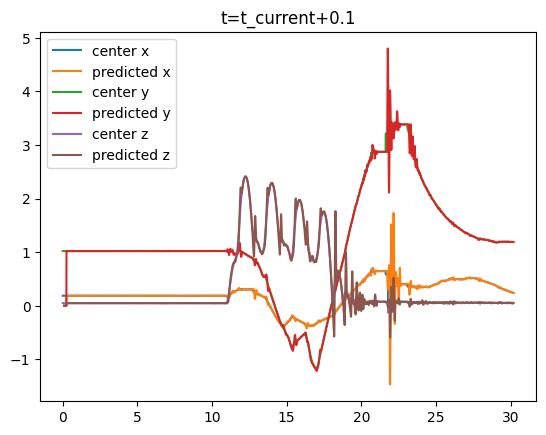

In [13]:
idx = 2
t_ahead = future_times[idx]

plt.plot(msg_timestamp_all, center_all[:, 0], label='center x')
plt.plot(msg_timestamp_all+t_ahead, future_pos_all[:,idx,0], label='predicted x')
plt.plot(msg_timestamp_all, center_all[:, 1], label='center y')
plt.plot(msg_timestamp_all+t_ahead, future_pos_all[:,idx,1], label='predicted y')
plt.plot(msg_timestamp_all, center_all[:, 2], label='center z')
plt.plot(msg_timestamp_all+t_ahead, future_pos_all[:,idx,2], label='predicted z')
plt.legend()
plt.title("t=t_current+{}".format(t_ahead))

Text(0.5, 1.0, 't=t_current+0.15')

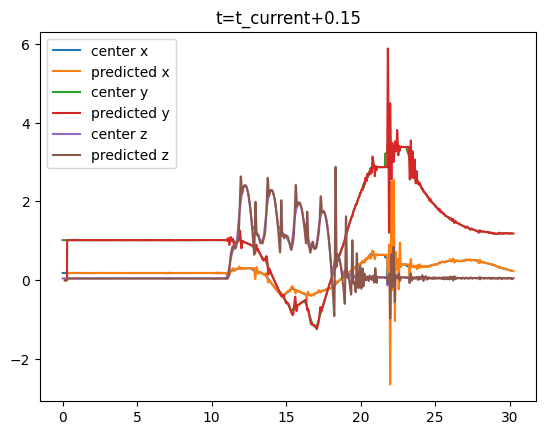

In [14]:
idx = 3
t_ahead = future_times[idx]

plt.plot(msg_timestamp_all, center_all[:, 0], label='center x')
plt.plot(msg_timestamp_all+t_ahead, future_pos_all[:,idx,0], label='predicted x')
plt.plot(msg_timestamp_all, center_all[:, 1], label='center y')
plt.plot(msg_timestamp_all+t_ahead, future_pos_all[:,idx,1], label='predicted y')
plt.plot(msg_timestamp_all, center_all[:, 2], label='center z')
plt.plot(msg_timestamp_all+t_ahead, future_pos_all[:,idx,2], label='predicted z')
plt.legend()
plt.title("t=t_current+{}".format(t_ahead))

Text(0.5, 1.0, 't=t_current+0.2')

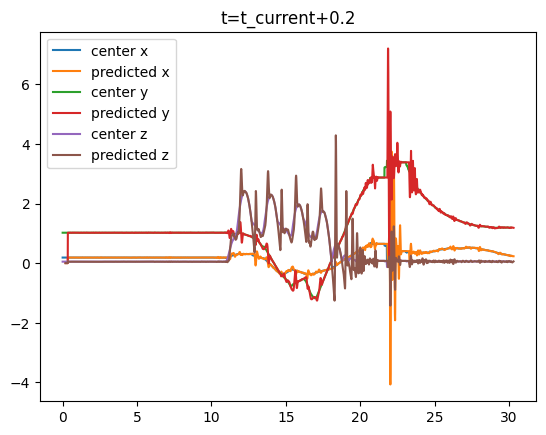

In [15]:
idx = 4
t_ahead = future_times[idx]

plt.plot(msg_timestamp_all, center_all[:, 0], label='center x')
plt.plot(msg_timestamp_all+t_ahead, future_pos_all[:,idx,0], label='predicted x')
plt.plot(msg_timestamp_all, center_all[:, 1], label='center y')
plt.plot(msg_timestamp_all+t_ahead, future_pos_all[:,idx,1], label='predicted y')
plt.plot(msg_timestamp_all, center_all[:, 2], label='center z')
plt.plot(msg_timestamp_all+t_ahead, future_pos_all[:,idx,2], label='predicted z')
plt.legend()
plt.title("t=t_current+{}".format(t_ahead))

Text(0.5, 1.0, 't=t_current+0.0')

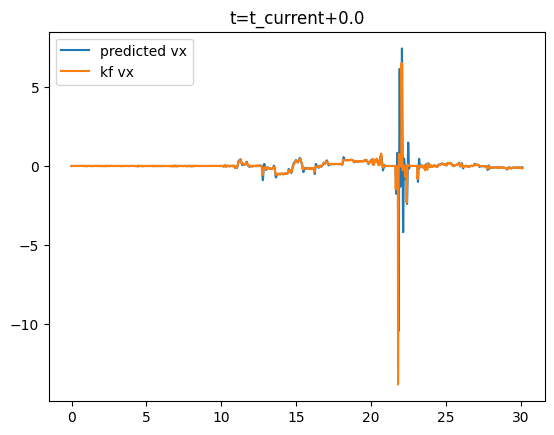

In [16]:
idx = 0
t_ahead = future_times[idx]

plt.plot(msg_timestamp_all+t_ahead, future_vel_all[:,idx,0], label='predicted vx')
plt.plot(msg_timestamp_all, kf_vel_all[:,0], label='kf vx')

plt.legend()
plt.title("t=t_current+{}".format(t_ahead))

Text(0.5, 1.0, 't=t_current+0.0')

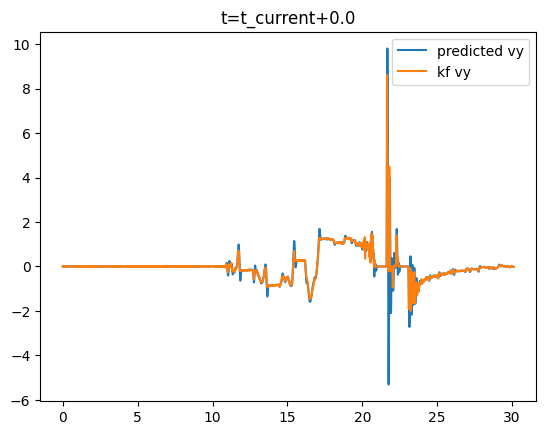

In [17]:
idx = 0
t_ahead = future_times[idx]

plt.plot(msg_timestamp_all+t_ahead, future_vel_all[:,idx,1], label='predicted vy')
plt.plot(msg_timestamp_all, kf_vel_all[:,1], label='kf vy')

plt.legend()
plt.title("t=t_current+{}".format(t_ahead))

Text(0.5, 1.0, 't=t_current+0.0')

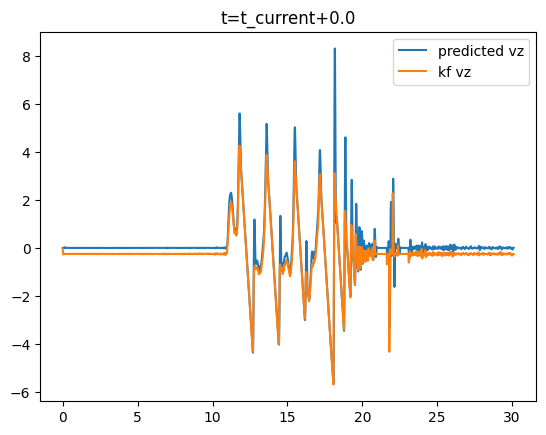

In [18]:
idx = 0
t_ahead = future_times[idx]

plt.plot(msg_timestamp_all+t_ahead, future_vel_all[:,idx,2], label='predicted vz')
plt.plot(msg_timestamp_all, kf_vel_all[:,2], label='kf vz')

plt.legend()
plt.title("t=t_current+{}".format(t_ahead))

Text(0.5, 1.0, 't=t_current+0.05')

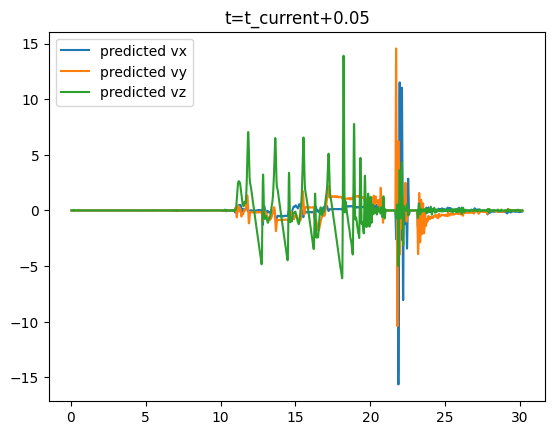

In [19]:
idx = 1
t_ahead = future_times[idx]

plt.plot(msg_timestamp_all+t_ahead, future_vel_all[:,idx,0], label='predicted vx')
plt.plot(msg_timestamp_all+t_ahead, future_vel_all[:,idx,1], label='predicted vy')
plt.plot(msg_timestamp_all+t_ahead, future_vel_all[:,idx,2], label='predicted vz')
plt.legend()
plt.title("t=t_current+{}".format(t_ahead))

Text(0.5, 1.0, 't=t_current+0.1')

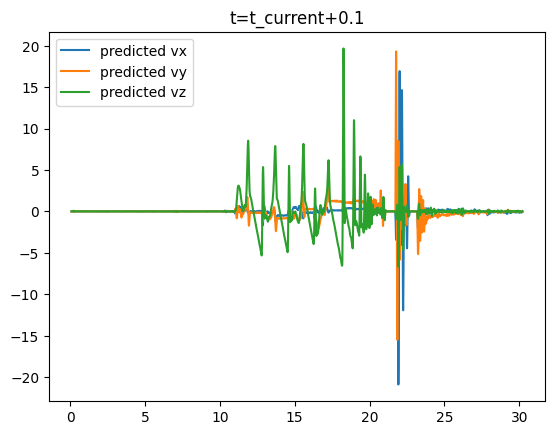

In [20]:
idx = 2
t_ahead = future_times[idx]

plt.plot(msg_timestamp_all+t_ahead, future_vel_all[:,idx,0], label='predicted vx')
plt.plot(msg_timestamp_all+t_ahead, future_vel_all[:,idx,1], label='predicted vy')
plt.plot(msg_timestamp_all+t_ahead, future_vel_all[:,idx,2], label='predicted vz')
plt.legend()
plt.title("t=t_current+{}".format(t_ahead))

Text(0.5, 1.0, 't=t_current+0.15')

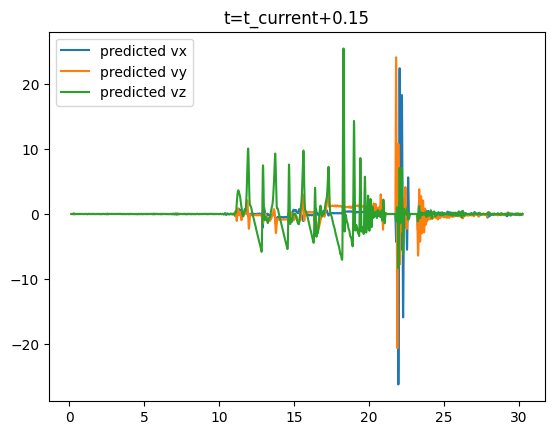

In [21]:
idx = 3
t_ahead = future_times[idx]

plt.plot(msg_timestamp_all+t_ahead, future_vel_all[:,idx,0], label='predicted vx')
plt.plot(msg_timestamp_all+t_ahead, future_vel_all[:,idx,1], label='predicted vy')
plt.plot(msg_timestamp_all+t_ahead, future_vel_all[:,idx,2], label='predicted vz')
plt.legend()
plt.title("t=t_current+{}".format(t_ahead))